## 读取数据
## 特征选择与预处理
## 数据规范化
## 模型选择与应用
## 效果评估

## 读取数据

In [59]:
#导包
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

In [60]:
## 读取数据
data=pd.read_csv('Mall_Customers.csv',index_col='CustomerID')
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## 特征选择与预处理

In [61]:
#将性别类别转为数字 
from sklearn.preprocessing import LabelEncoder
#实力一个LabelEncoder
le=LabelEncoder()
#fit_transform一下
data['Gender']=le.fit_transform(data['Gender'])
data#这样就把性别转为数字了 接下来对数据规范化 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


## 数据规范化

In [62]:
#然后把数据用[0-1]规范化一下   首先实例化一个MinMaxScaler
min_max_scaler=preprocessing.MinMaxScaler()
data=min_max_scaler.fit_transform(data)
data[0:10]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ]])

## 模型选择与应用
## 效果评估

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
#用手肘法 看看 不同聚类个数的效果
distortions=[]#簇内误差平方和
sil_score=[]#轮廓系数

for i in range(2,15):
    kmeans_model=KMeans(n_clusters=i)
    predict_y=kmeans_model.fit_predict(data)
    
    distortions.append(kmeans_model.inertia_)#簇内误差平方和    
    sil_score.append( silhouette_score(data,predict_y) )#轮廓系数
    
print('簇内误差平方和：',distortions)   
print('轮廓系数：',sil_score) 

簇内误差平方和： [37.27227241211876, 29.552857611943857, 22.39096001192855, 19.060906968996804, 16.4156709816699, 14.225217482045638, 12.26915494127844, 10.610998460321946, 9.403891128552731, 8.510694298352691, 7.808974073017027, 7.100018884012305, 6.482285246626701]
轮廓系数： [0.5194624832665107, 0.45835255811254244, 0.3641657522339062, 0.3722192265604816, 0.3776415902227895, 0.385743037102558, 0.39448602106548764, 0.4167843649468325, 0.4323726547377211, 0.4159862539782121, 0.4317066755772662, 0.42626231042951973, 0.42403922343716954]


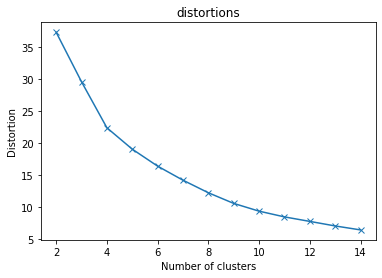

In [64]:
plt.plot(range(2,15),distortions,marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('distortions')
plt.show()#这个就像一个手肘一样  然后找到斜率变化最突然的两边 

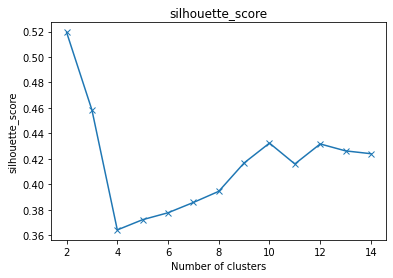

In [65]:
plt.plot(range(2,15),sil_score,marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.title('silhouette_score')
plt.show()